# Reprojecting PyVista Mesh to Different Map Projections

In [1]:
import pyvista as pv

from pv_utils import PolydataTransformFilter, mesh_from_nc, get_coastlines
import numpy as np

In [2]:
# Create Pyvista mesh from a netcdf file.
mesh = mesh_from_nc(fname='../qrclim.sst.ugrid.nc', data_type='real')

# Get geometries representing the coastlines as a collection of PolyData objects.
coastlines = get_coastlines('110m')

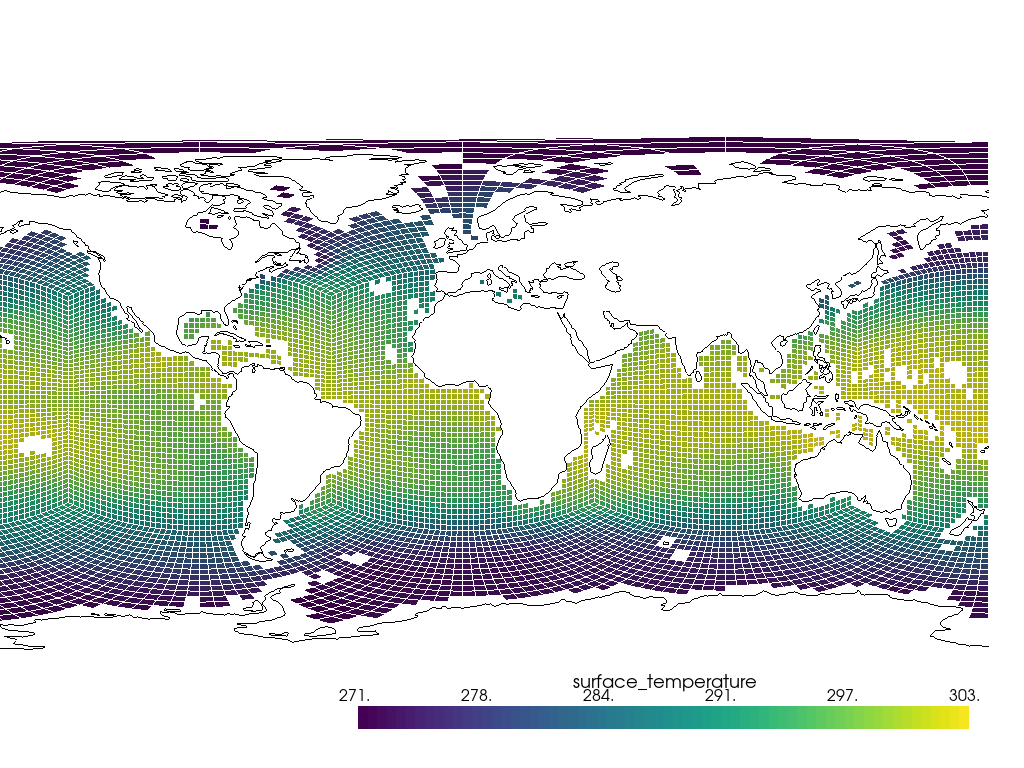

In [3]:
# Plot the original Plate Carree projection.
p = pv.Plotter()
p.add_mesh(mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))

# Add coastlines.
for block in coastlines:
    p.add_mesh(block, color="black")

p.background_color = 'white'
p.camera_position = [(16.869657976834926, 5.235398397963124, 490.2717016329161),
                     (16.869657976834926, 5.235398397963124, 0.0),
                     (0.0, 1.0, 0.0)]
p.show()

In [4]:
# Set up Mollweide transformer.
moll_transformer = PolydataTransformFilter('moll')

# Reproject the mesh from platecarree to a mollweide projection.
moll_mesh = moll_transformer.transform(mesh)

# Reproject the coastlines
moll_coastlines = [moll_transformer.transform(block) for block in coastlines]

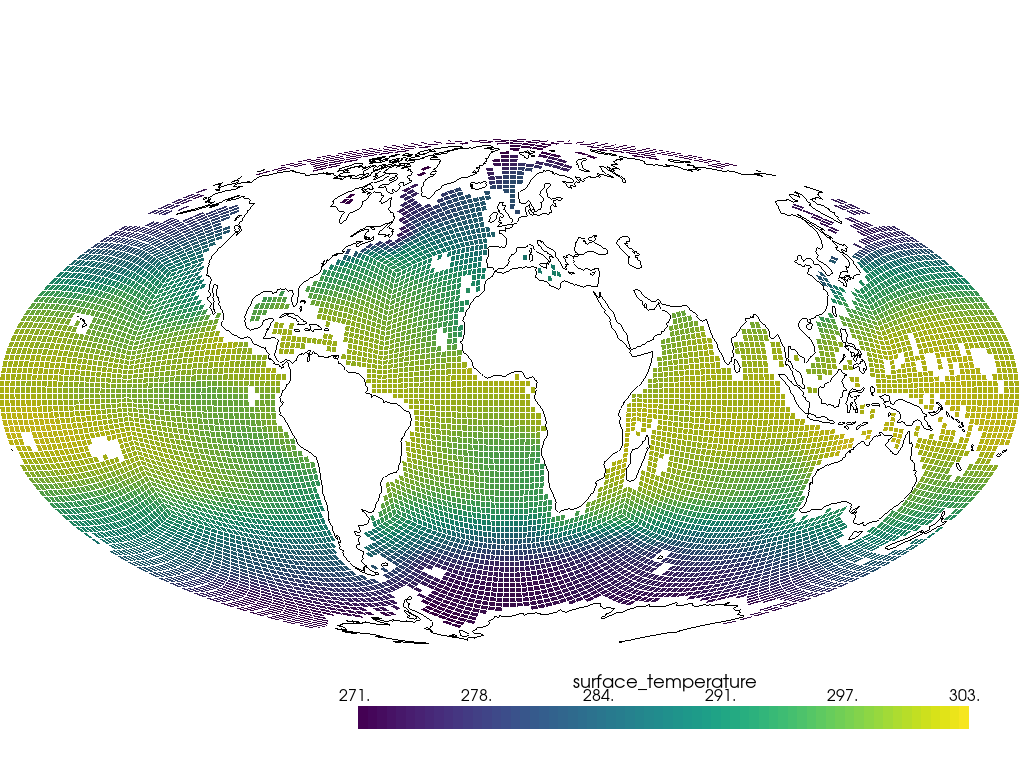

In [5]:
# Plot the Mollweide projection.
p = pv.Plotter()
p.add_mesh(moll_mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))

# Add coastlines:
for block in moll_coastlines:
    p.add_mesh(block, color="black")

p.background_color = 'white'
p.camera_position = [(93959.85410932079, 328636.4707611543, 50654659.22149858),
                     (93959.85410932079, 328636.4707611543, 0.0),
                     (0.0, 1.0, 0.0)]
p.show(screenshot='mollweide_coastlines.png')

In [6]:
# Set up Mollweide transformer.
sinu_transformer = PolydataTransformFilter('sinu')

# Reproject the mesh from platecarree to a sinusoidal projection.
sinu_mesh = sinu_transformer.transform(mesh)

# Reproject the coastlines
sinu_coastlines = [sinu_transformer.transform(block) for block in coastlines]

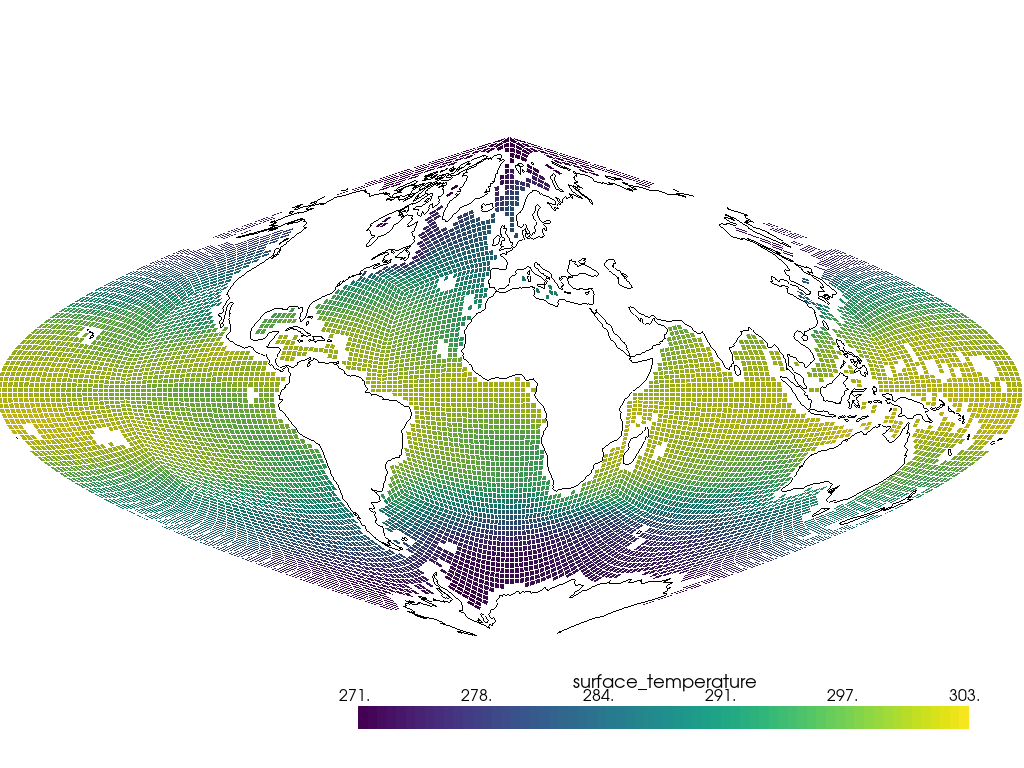

In [7]:
# Plot the sinusoidal projection.
p = pv.Plotter()
p.add_mesh(sinu_mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))

# Add coastlines:
for block in sinu_coastlines:
    p.add_mesh(block, color="black")

p.background_color = 'white'
p.camera_position = [(93959.85410932079, 328636.4707611543, 55954659.22149858),
                     (93959.85410932079, 328636.4707611543, 0.0),
                     (0.0, 1.0, 0.0)]
p.show()